Sample Data:
   transaction_amount  transaction_time  account_age_days  \
0          938.536180                18               593   
1         6020.242862                 7               848   
2         2633.491387                 6               427   
3         1825.885108                15              1653   
4          339.249741                18               830   

   num_prev_transactions  
0                    466  
1                    115  
2                    428  
3                    236  
4                    338  
Class Distribution:
fraud
0    4850
1     150
Name: count, dtype: int64


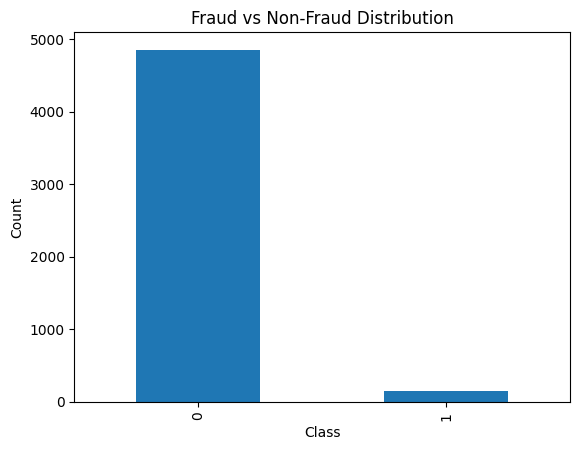

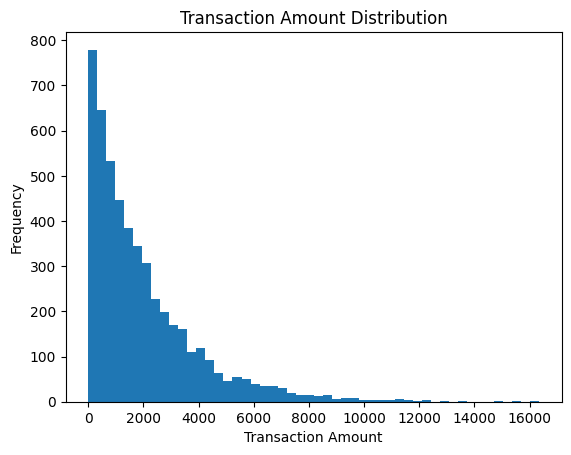


Applying SMOTE to balance dataset...
After SMOTE:
fraud
0    4850
1    4850
Name: count, dtype: int64

===== Random Forest Report =====
              precision    recall  f1-score   support

           0       0.97      0.95      0.96      1458
           1       0.95      0.97      0.96      1452

    accuracy                           0.96      2910
   macro avg       0.96      0.96      0.96      2910
weighted avg       0.96      0.96      0.96      2910


===== Logistic Regression Report =====
              precision    recall  f1-score   support

           0       0.49      0.49      0.49      1458
           1       0.48      0.48      0.48      1452

    accuracy                           0.49      2910
   macro avg       0.49      0.49      0.49      2910
weighted avg       0.49      0.49      0.49      2910



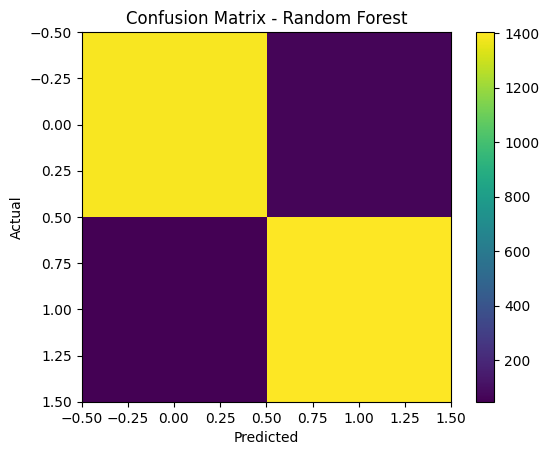

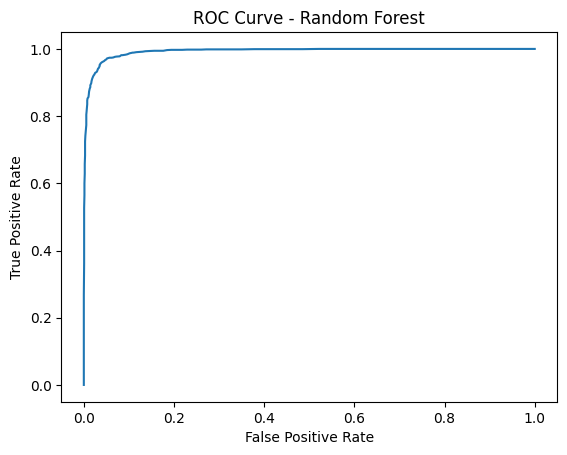

Random Forest AUC Score: 0.9924702978154156


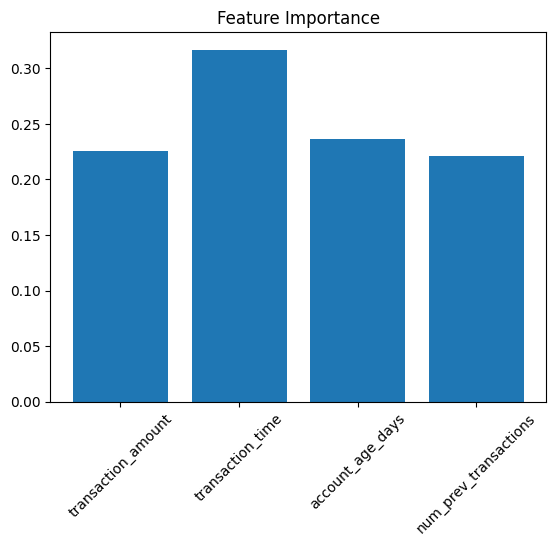


Sample Risk Scoring Output:
   fraud_probability risk_level
0               0.05   Low Risk
1               0.26   Low Risk
2               0.15   Low Risk
3               0.15   Low Risk
4               0.05   Low Risk

Model saved successfully as fraud_model.pkl

Project Execution Completed Successfully 


In [1]:
# ==========================================================
# AI-POWERED FRAUD RISK SCORING SYSTEM
# Complete Final Version (Error-Free)
# ==========================================================

# -------------------------------
# 1. Import Libraries
# -------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
import joblib

# -------------------------------
# 2. Create Synthetic Dataset
# -------------------------------
np.random.seed(42)
n_samples = 5000

data = pd.DataFrame({
    "transaction_amount": np.random.exponential(scale=2000, size=n_samples),
    "transaction_time": np.random.randint(0, 24, n_samples),
    "account_age_days": np.random.randint(10, 2000, n_samples),
    "num_prev_transactions": np.random.randint(1, 500, n_samples),
})
df=pd.DataFrame(data)
print("Sample Data:")
print(df.head())

# Create 3% Fraud Cases
data["fraud"] = 0
fraud_indices = np.random.choice(data.index, size=int(0.03 * n_samples), replace=False)
data.loc[fraud_indices, "fraud"] = 1

print("Class Distribution:")
print(data["fraud"].value_counts())

# -------------------------------
# 3. Exploratory Data Analysis
# -------------------------------

# Class Distribution
plt.figure()
data["fraud"].value_counts().plot(kind="bar")
plt.title("Fraud vs Non-Fraud Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

# Transaction Amount Distribution
plt.figure()
plt.hist(data["transaction_amount"], bins=50)
plt.title("Transaction Amount Distribution")
plt.xlabel("Transaction Amount")
plt.ylabel("Frequency")
plt.show()

# -------------------------------
# 4. Data Preprocessing
# -------------------------------
X = data.drop("fraud", axis=1)
y = data["fraud"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -------------------------------
# 5. Handle Imbalance using SMOTE
# -------------------------------
print("\nApplying SMOTE to balance dataset...")
smote = SMOTE(random_state=42, k_neighbors=3)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

# -------------------------------
# 6. Train-Test Split
# -------------------------------
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

# -------------------------------
# 7. Model Training
# -------------------------------
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

# -------------------------------
# 8. Model Evaluation
# -------------------------------
rf_pred = rf_model.predict(X_test)
lr_pred = lr_model.predict(X_test)

print("\n===== Random Forest Report =====")
print(classification_report(y_test, rf_pred))

print("\n===== Logistic Regression Report =====")
print(classification_report(y_test, lr_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
plt.imshow(cm)
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.colorbar()
plt.show()

# ROC Curve
rf_prob = rf_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, rf_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr)
plt.title("ROC Curve - Random Forest")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

print("Random Forest AUC Score:", roc_auc)

# -------------------------------
# 9. Feature Importance
# -------------------------------
importances = rf_model.feature_importances_
features = X.columns

plt.figure()
plt.bar(features, importances)
plt.title("Feature Importance")
plt.xticks(rotation=45)
plt.show()

# -------------------------------
# 10. Risk Scoring System
# -------------------------------
data["fraud_probability"] = rf_model.predict_proba(X_scaled)[:,1]

def risk_category(prob):
    if prob > 0.7:
        return "High Risk"
    elif prob > 0.4:
        return "Medium Risk"
    else:
        return "Low Risk"

data["risk_level"] = data["fraud_probability"].apply(risk_category)

print("\nSample Risk Scoring Output:")
print(data[["fraud_probability", "risk_level"]].head())

# -------------------------------
# 11. Save Model for Deployment
# -------------------------------
joblib.dump(rf_model, "fraud_model.pkl")
print("\nModel saved successfully as fraud_model.pkl")

print("\nProject Execution Completed Successfully ")